In [ ]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

In [33]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [34]:
img_rows,img_cols = 48,48
train_dir = './images/train'
validation_dir = './images/validation'

### Initialising train and test data
#### Then rescaling them. All the other parameters in ImageDataGenerator for trai data are to create more sample images, like horizontal_flip will make a mirror image. hence increasing the size of out train dataset.

In [35]:
train_data = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.3,
                height_shift_range=0.3,
                horizontal_flip=True,
                vertical_flip=True)
validation_data = ImageDataGenerator(rescale=1./255)

### Generating data from the images in our directory

In [36]:
train_gen = train_data.flow_from_directory(
                                train_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=8,
                                class_mode='categorical',
                                shuffle=True)
validation_gen = validation_data.flow_from_directory(
                                validation_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=8,
                                class_mode='categorical',
                                shuffle=True)

Found 20289 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


#### Initialising our model to Sequential model provided by keras

In [37]:
mah_model = Sequential()

#### Adding 2D convolution layer with 32 as the dimensionality of the output space

In [38]:
mah_model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Adding 2D convolution layer with 64 as the dimensionality of the output space

In [39]:
mah_model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Adding 2D convolution layer with 128 as the dimensionality of the output space

In [40]:
mah_model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Adding 2D convolution layer with 256 as the dimensionality of the output space

In [41]:
mah_model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Flattening the output from convolution layers

In [42]:
mah_model.add(Flatten())
mah_model.add(Dense(64,kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Dropout(0.5))

In [43]:
mah_model.add(Dense(64,kernel_initializer='he_normal'))
mah_model.add(Activation('elu'))
mah_model.add(BatchNormalization())
mah_model.add(Dropout(0.5))

#### softmax used as activation function as our input is in a range from (0,1) 

In [54]:
mah_model.add(Dense(4,kernel_initializer='he_normal'))
mah_model.add(Activation('softmax'))

In [55]:
mah_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

##### Save the model with best accuracy

In [56]:
checkpoint = ModelCheckpoint(
    'Emotion_detect.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

##### Stop if the accuracy of our model stops improving after 3 rounds

In [57]:
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True)

##### Reduce the learning rate if accuracy is not improving after 3 rounds

In [58]:
reduce_alpha = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001)

In [59]:
callbacks = [checkpoint,earlystop,reduce_alpha]

In [60]:
mah_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'])

In [63]:
no_train_img = 20289
no_validation_img = 4977

In [62]:
fit_model = mah_model.fit(
                train_gen,
                steps_per_epoch=no_train_img//8,
                epochs=30,
                callbacks=callbacks,
                validation_data=validation_gen,
                validation_steps=no_validation_img//8)

Epoch 1/30
2536/2536 [==============================] - ETA: 0s - loss: 1.3406 - accuracy: 0.3358
Epoch 00001: val_loss improved from inf to 1.32538, saving model to Emotion_detect.h5
2536/2536 [==============================] - 399s 157ms/step - loss: 1.3406 - accuracy: 0.3358 - val_loss: 1.3254 - val_accuracy: 0.3666 - lr: 0.0010
Epoch 2/30
2536/2536 [==============================] - ETA: 0s - loss: 1.3246 - accuracy: 0.3513
Epoch 00002: val_loss improved from 1.32538 to 1.32125, saving model to Emotion_detect.h5
2536/2536 [==============================] - 355s 140ms/step - loss: 1.3246 - accuracy: 0.3513 - val_loss: 1.3213 - val_accuracy: 0.3668 - lr: 0.0010
Epoch 3/30
2536/2536 [==============================] - ETA: 0s - loss: 1.3067 - accuracy: 0.3593
Epoch 00003: val_loss did not improve from 1.32125
2536/2536 [==============================] - 316s 125ms/step - loss: 1.3067 - accuracy: 0.3593 - val_loss: 1.3620 - val_accuracy: 0.2586 - lr: 0.0010
Epoch 4/30
2536/2536 [=======

2536/2536 [==============================] - ETA: 0s - loss: 1.0329 - accuracy: 0.5521
Epoch 00026: val_loss did not improve from 0.86400
2536/2536 [==============================] - 321s 127ms/step - loss: 1.0329 - accuracy: 0.5521 - val_loss: 0.8645 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 27/30
2536/2536 [==============================] - ETA: 0s - loss: 1.0277 - accuracy: 0.5556
Epoch 00027: val_loss improved from 0.86400 to 0.83406, saving model to Emotion_detect.h5
2536/2536 [==============================] - 316s 125ms/step - loss: 1.0277 - accuracy: 0.5556 - val_loss: 0.8341 - val_accuracy: 0.6626 - lr: 0.0010
Epoch 28/30
2536/2536 [==============================] - ETA: 0s - loss: 1.0146 - accuracy: 0.5635
Epoch 00028: val_loss improved from 0.83406 to 0.81118, saving model to Emotion_detect.h5
2536/2536 [==============================] - 316s 125ms/step - loss: 1.0146 - accuracy: 0.5635 - val_loss: 0.8112 - val_accuracy: 0.6640 - lr: 0.0010
Epoch 29/30
2536/2536 [===========

In [67]:
import cv2
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [76]:
saved_model = load_model('./Emotion_detect.h5')
plabels = ['Happy','Neutral','Sad','Surprise']

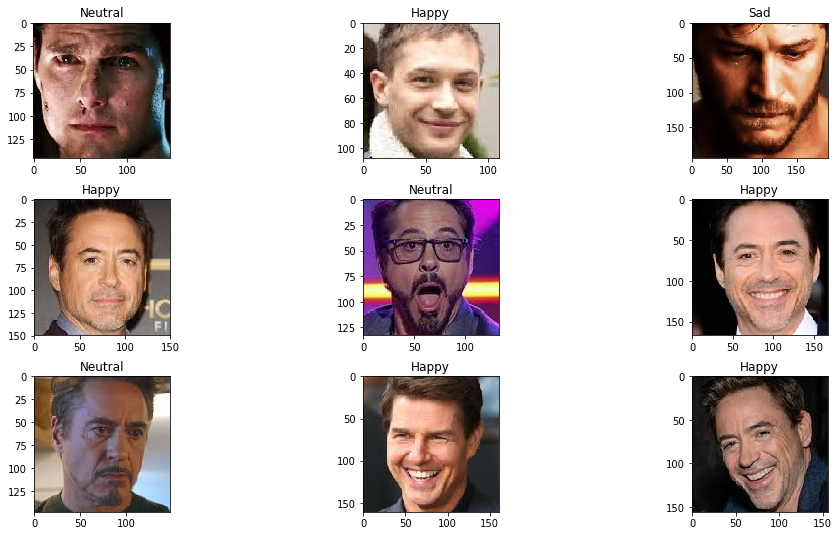

In [116]:
test_dir = "./images/test"
index = 1
fig = plt.figure(figsize=(16,9))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for image in os.listdir(test_dir):
    image_path = os.path.join(test_dir, image)
    img_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_data, (48, 48))
    new_img_data = new_img_array.astype('float')/255
    new_img_data = new_img_data.reshape(1, 48, 48, 1)
    prediction = saved_model.predict(new_img_data)[0]
    i = Image.open(image_path)
    iar = np.asarray(i)
    ax = fig.add_subplot(3, 3, index)
    plt.imshow(iar)
    imgplot = plt.imshow(iar)
    ax.set_title(plabels[prediction.argmax()])
    index = index + 1